In [2]:
import numpy as np
import nibabel as nb
import pandas as pd
import scipy.io
from scipy import stats
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import *

In [3]:
Run1Seconds = np.array([i for i in range(819, 900+1)])
Run2Seconds = np.array([i for i in range(1737, 1818+1)])
Run3Seconds = np.array([i for i in range(2652, 2733+1)])
Run4Seconds = np.array([i for i in range(3553, 3634+1)])

In [4]:
Run1Seconds.shape

(82,)

In [5]:
RunSeconds = np.array([Run1Seconds, Run2Seconds, Run3Seconds, Run4Seconds])

In [6]:
file_path = 'E:/FPP_files_and_codes/FPP_files/relabeled_seconds/corrected_GPT_labeling/final_labels.csv'

RelabelDataframe = pd.read_csv(file_path)

In [7]:
RelabelDataframe

,prv_label,new_label
0,NaN,NaN
1,abdomen,Body
2,airliner,Object
3,airplane,Object
4,animal,Animal
...,...,...
595,woman,Body
596,work,Unclear
597,workshop,Place
598,wristband,Object


In [8]:
RelabelDictionary = {}
for index, row in RelabelDataframe.iterrows():
    if index != 0:
        RelabelDictionary[row['prv_label']] = row['new_label']
RelabelDictionary[''] = float('nan')

In [9]:
RelabelDictionary

{'abdomen': 'Body',
 'airliner': 'Object',
 'airplane': 'Object',
 'animal': 'Animal',
 'animation': 'Object',
 'apparel': 'Object',
 'appliance': 'Object',
 'arch': 'Place',
 'arise': 'Unclear',
 'arm': 'Body',
 'armament': 'Object',
 'armchair': 'Object',
 'ascend': 'Unclear',
 'ashcan': 'Object',
 'automaton': 'Object',
 'automobile_horn': 'Object',
 'awning': 'Object',
 'ax': 'Object',
 'baby': 'Body',
 'back': 'Body',
 'back_up': 'Unclear',
 'backhoe': 'Object',
 'backpack': 'Object',
 'bag': 'Object',
 'balcony': 'Place',
 'ball': 'Object',
 'bamboo': 'Object',
 'band': 'Body',
 'barber': 'Body',
 'barbershop': 'Place',
 'barrel': 'Object',
 'barroom': 'Place',
 'base': 'Place',
 'baseball': 'Unclear',
 'baseball_bat': 'Object',
 'basement': 'Place',
 'basket': 'Object',
 'bathroom': 'Place',
 'beach': 'Place',
 'beacon': 'Place',
 'beam': 'Object',
 'beard': 'Face',
 'bed': 'Object',
 'bedroom': 'Place',
 'bee': 'Animal',
 'beer': 'Object',
 'beet': 'Object',
 'bench': 'Object',

In [10]:
labels_list_1 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie1_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_1.append(labels)
labels_list_2 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie2_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_2.append(labels)
labels_list_3 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie3_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_3.append(labels)
labels_list_4 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie4_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_4.append(labels)
labels_list = labels_list_1 + labels_list_2 + labels_list_3  + labels_list_4
print(len(labels_list))

3655


In [11]:
RelabeldFrames = [set() for i in range(3655)]
for i in range(3655):
    for j in labels_list[i]:
        RelabeldFrames[i].add(str(RelabelDictionary[j]))

In [12]:
RunsWithoutFB = np.empty(4, dtype=object)
for i in range(4):
    RunsWithoutFB[i] = []
for i in range(4):
    for j in RunSeconds[i]:
        if ('Face' not in RelabeldFrames[j]) and ('Body' not in RelabeldFrames[j]) and ('Animal' not in RelabeldFrames[j]):
            RunsWithoutFB[i].append(j)

In [13]:
RunsWithoutFB

array([list([819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 849, 850, 871, 872, 877, 878, 879, 884, 885, 886, 891, 892]),
       list([1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1767, 1768, 1789, 1790, 1795, 1796, 1797, 1802, 1803, 1804, 1809, 1810]),
       list([2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2682, 2683, 2704, 2705, 2710, 2711, 2712, 2717, 2718, 2719, 2724, 2725]),
       list([3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3583, 3584, 3605, 3606, 3611, 3612, 3613, 3618, 3619, 3620, 3625, 3626])],
      dtype=object)

In [14]:
PreferedSeconds = np.array([np.array(RunsWithoutFB[i]) for i in range(4)])

In [15]:
PreferedSeconds.shape

(4, 29)

In [16]:
PreferedSeconds

array([[ 819,  820,  821,  822,  823,  824,  825,  826,  827,  828,  829,
         830,  831,  832,  833,  834,  835,  849,  850,  871,  872,  877,
         878,  879,  884,  885,  886,  891,  892],
       [1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747,
        1748, 1749, 1750, 1751, 1752, 1753, 1767, 1768, 1789, 1790, 1795,
        1796, 1797, 1802, 1803, 1804, 1809, 1810],
       [2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662,
        2663, 2664, 2665, 2666, 2667, 2668, 2682, 2683, 2704, 2705, 2710,
        2711, 2712, 2717, 2718, 2719, 2724, 2725],
       [3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563,
        3564, 3565, 3566, 3567, 3568, 3569, 3583, 3584, 3605, 3606, 3611,
        3612, 3613, 3618, 3619, 3620, 3625, 3626]])

In [15]:
np.save('E:/FPP_files_and_codes/FPP_files/last_clip_each_run_without_animate_frames/last_clip_each_run_without_animate_frames.npy', PreferedSeconds)

In [21]:
delay = 4
ShiftedPreferedSeconds = (PreferedSeconds + delay)%3655

In [22]:
ShiftedPreferedSeconds

array([[ 823,  824,  825,  826,  827,  828,  829,  830,  831,  832,  833,
         834,  835,  836,  837,  838,  839,  853,  854,  875,  876,  881,
         882,  883,  888,  889,  890,  895,  896],
       [1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751,
        1752, 1753, 1754, 1755, 1756, 1757, 1771, 1772, 1793, 1794, 1799,
        1800, 1801, 1806, 1807, 1808, 1813, 1814],
       [2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666,
        2667, 2668, 2669, 2670, 2671, 2672, 2686, 2687, 2708, 2709, 2714,
        2715, 2716, 2721, 2722, 2723, 2728, 2729],
       [3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567,
        3568, 3569, 3570, 3571, 3572, 3573, 3587, 3588, 3609, 3610, 3615,
        3616, 3617, 3622, 3623, 3624, 3629, 3630]], dtype=int32)

In [23]:
left_movie_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_left_Meanfile.mat')['Left_data']
right_movie_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_right_Meanfile.mat')['Right_data']

In [24]:
FPPs_right = (nb.load('E:/FPP_files_and_codes/FPP_files/FPPs_combined/FPPs.rh.func.gii').darrays[0].data).T
FPPs_left = (nb.load('E:/FPP_files_and_codes/FPP_files/FPPs_combined/FPPs.lh.func.gii').darrays[0].data).T
right_FPPs_indices = [np.nonzero(FPPs_right[i]) for i in range(5)]
left_FPPs_indices = [np.nonzero(FPPs_left[i]) for i in range(5)]

In [34]:
FPPs_right.shape

(5, 32492)

In [25]:
Mean_activity_each_FPP_in_each_run = np.zeros((5,4))
SEM_each_FPP_in_each_run = np.zeros((5,4))

for FPP in range(5):
    for run in range(4):
        Activity_each_vertices_in_each_run = np.concatenate((right_movie_data[right_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[run]], left_movie_data[left_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[run]]))
        Mean_activity_FPP_in_each_second_of_run = np.mean(Activity_each_vertices_in_each_run, axis=0)
        Mean_activity_FPP_in_each_run = np.mean(Mean_activity_FPP_in_each_second_of_run)
        Mean_activity_each_FPP_in_each_run[FPP, run] = Mean_activity_FPP_in_each_run
        SEM_each_FPP_in_each_run[FPP,run] = stats.sem(Mean_activity_FPP_in_each_second_of_run)

In [26]:
Mean_activity_each_FPP_in_each_run

array([[0.06903589, 0.07114626, 0.01832419, 0.05866088],
       [0.10691905, 0.1839698 , 0.12314774, 0.14454909],
       [0.10795955, 0.26737724, 0.21559423, 0.26795417],
       [0.08465093, 0.28059275, 0.24270357, 0.31258815],
       [0.13732913, 0.31127071, 0.24218545, 0.27772396]])

In [27]:
scipy.io.loadmat('E:/FPP_files_and_codes/FPP_codebase/Figure5_analysis/result.mat')['activity_sub_patch_run'][0]

array([-0.15702436,  0.1546769 ,  0.22006072,  0.33388004,  0.29814622,
        0.24178316,  0.06521909,  0.21375845,  0.18768041, -0.09578602,
       -0.06748204,  0.07055642,  0.22025852,  0.25864978,  0.36764454,
        0.10469574,  0.08651896,  0.45023763,  0.36502667,  0.67337499])

In [28]:
activity_FPP_each_subject = np.zeros((5, 176, 4))
for i in range(5):
    a = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_codebase/Figure5_analysis/result.mat')['activity_sub_patch_run']
    col_mask = np.arange(a.shape[1]) % 5 == i
    activity_FPP_each_subject[i] = a[:, col_mask]

In [29]:
Mean_activity_each_FPP_in_each_run_arsalan = np.zeros((5,4))
SEM_each_FPP_in_each_run_arsalan = np.zeros((5,4))

for i in range(5):
    Mean_activity_each_FPP_in_each_run_arsalan[i] = np.mean(activity_FPP_each_subject[i], axis=0)
    SEM_each_FPP_in_each_run_arsalan[i] = stats.sem(activity_FPP_each_subject[i], axis=0)

In [30]:
Mean_activity_each_FPP_in_each_run_arsalan

array([[0.06903575, 0.07114638, 0.01832416, 0.05866111],
       [0.10691892, 0.18396991, 0.12314771, 0.14454936],
       [0.10795942, 0.26737733, 0.21559419, 0.26795442],
       [0.0846508 , 0.28059285, 0.24270353, 0.3125884 ],
       [0.13732901, 0.31127082, 0.24218544, 0.27772421]])

In [35]:
Mean_activity_each_FPP_in_each_run

array([[0.06903589, 0.07114626, 0.01832419, 0.05866088],
       [0.10691905, 0.1839698 , 0.12314774, 0.14454909],
       [0.10795955, 0.26737724, 0.21559423, 0.26795417],
       [0.08465093, 0.28059275, 0.24270357, 0.31258815],
       [0.13732913, 0.31127071, 0.24218545, 0.27772396]])

In [32]:
np.abs(Mean_activity_each_FPP_in_each_run - Mean_activity_each_FPP_in_each_run_arsalan).sum()

2.6099947821843494e-06

In [21]:
np.concatenate((right_movie_data[right_FPPs_indices[1]][:,ShiftedPreferedSeconds[1]], left_movie_data[left_FPPs_indices[1]][:,ShiftedPreferedSeconds[1]])).shape

(91, 29)

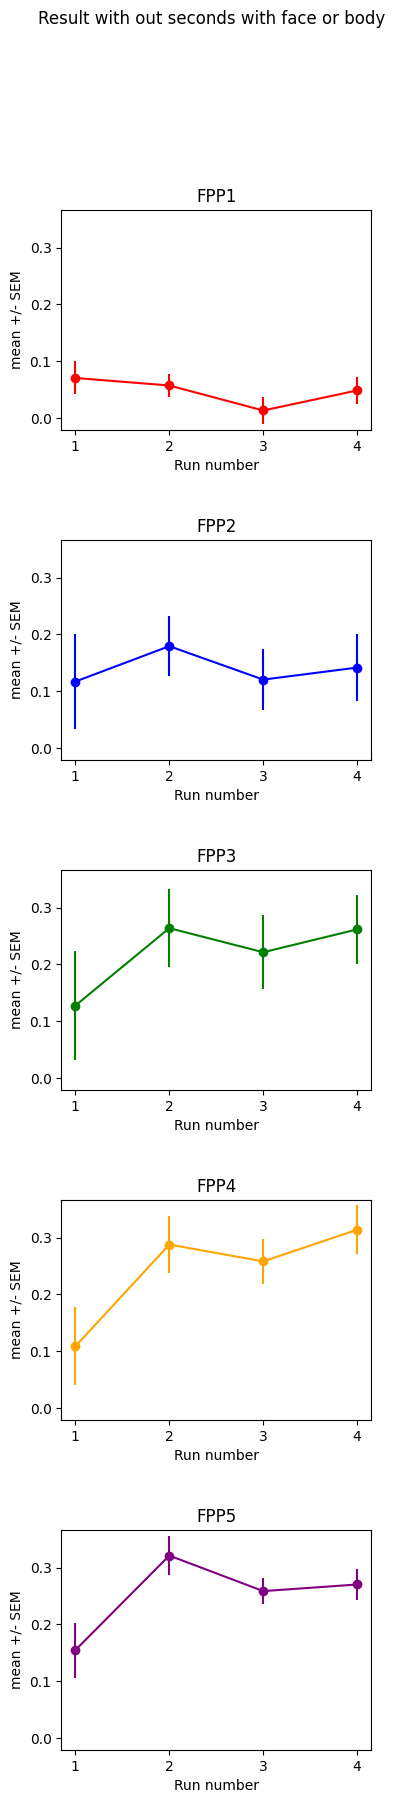

In [22]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(5, 1, figsize=(4, 20))
max_vals = []
min_vals = []
for i in range(5):
    max_vals.append(max(Mean_activity_each_FPP_in_each_run[i] + SEM_each_FPP_in_each_run[i]))
    min_vals.append(min(Mean_activity_each_FPP_in_each_run[i] - SEM_each_FPP_in_each_run[i]))

y_min = min(min_vals)-0.01
y_max = max(max_vals)+0.01
for i in range(5):
    axs[i].set_ylim(y_min, y_max)

# for i in range(5):
#     axs[i].set_yticks(np.arange(y_min, y_max+0.1,0.1))
    
for i in range(5):
    axs[i].errorbar(x, Mean_activity_each_FPP_in_each_run[i], yerr=SEM_each_FPP_in_each_run[i], fmt='-o', color=colors[i])
    axs[i].set_title(f'FPP{i+1}')
    axs[i].set_xticks(x)
    axs[i].set_xlabel('Run number')
    axs[i].set_ylabel('mean +/- SEM')
    axs[i].set_yticks([0,0.1,0.2,0.3])

plt.subplots_adjust(hspace=0.5)

plt.suptitle('Result with out seconds with face or body')
plt.show()

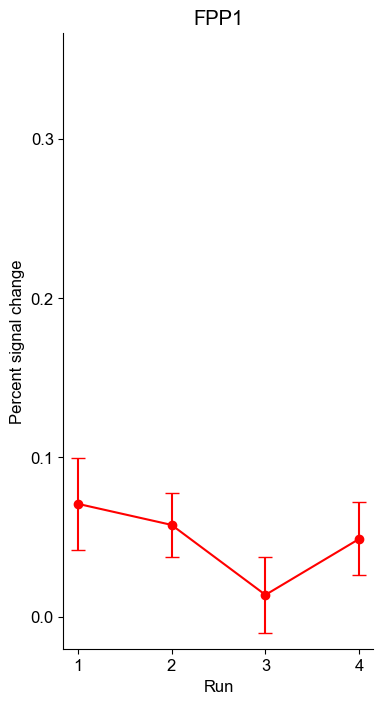

In [23]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[0], yerr=SEM_each_FPP_in_each_run[0],capsize=5, fmt='-o', color=colors[0])
plt.title('FPP1')
plt.xticks(x)
plt.xlabel('Run')
plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

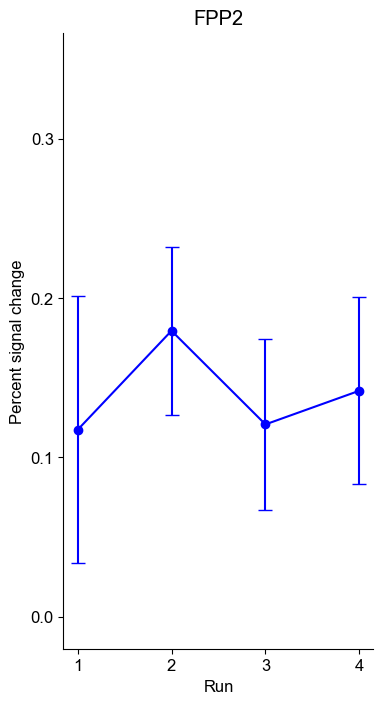

In [24]:

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[1], yerr=SEM_each_FPP_in_each_run[1],capsize=5, fmt='-o', color=colors[1])
plt.title('FPP2')
plt.xticks(x)
plt.xlabel('Run')
plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

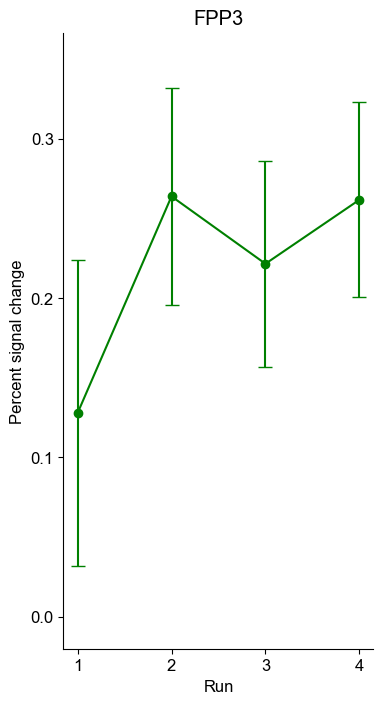

In [25]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[2], yerr=SEM_each_FPP_in_each_run[2],capsize=5, fmt='-o', color=colors[2])
plt.title('FPP3')
plt.xticks(x)
plt.xlabel('Run')
plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

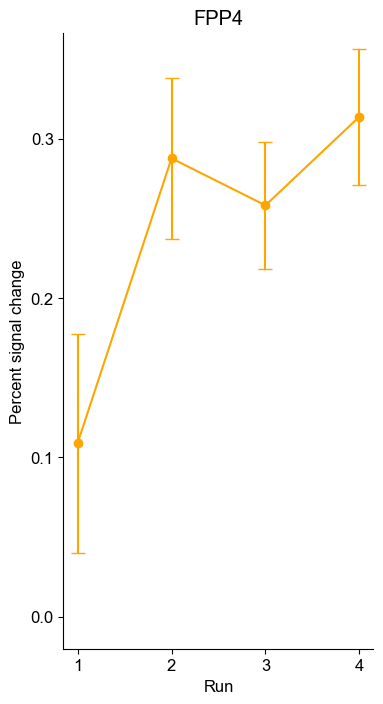

In [26]:

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[3], yerr=SEM_each_FPP_in_each_run[3],capsize=5, fmt='-o', color=colors[3])
plt.title('FPP4')
plt.xticks(x)
plt.xlabel('Run')
plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

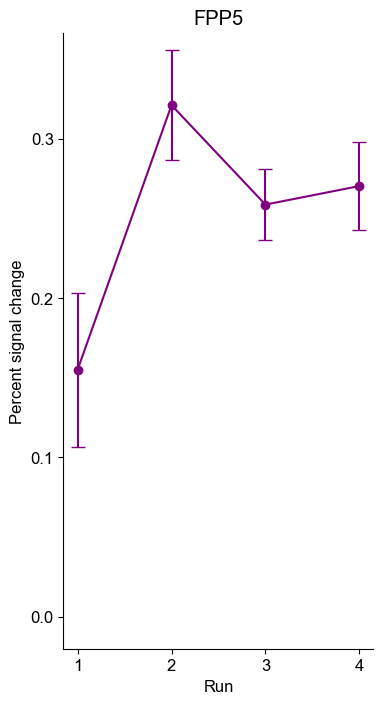

In [27]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'arial'
plt.figure(figsize=(4, 8))

plt.ylim(y_min, y_max)

plt.errorbar(x, Mean_activity_each_FPP_in_each_run[4], yerr=SEM_each_FPP_in_each_run[4],capsize=5, fmt='-o', color=colors[4])
plt.title('FPP5')
plt.xticks(x)
plt.xlabel('Run')
plt.ylabel('Percent signal change')
plt.yticks([0,0.1,0.2,0.3])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [28]:
Mean_activity_each_FPP_in_each_run

array([[0.07094901, 0.05769595, 0.01379826, 0.04897331],
       [0.11729408, 0.17945793, 0.1207279 , 0.14185349],
       [0.12782053, 0.26376539, 0.22148383, 0.26162185],
       [0.10896838, 0.28761538, 0.25811603, 0.31373005],
       [0.1549583 , 0.32099557, 0.25859801, 0.27023594]])

# difference run 2 and 1(SEM across frames)

In [29]:
difference_activity_run1_and_run2_int_each_FPP = np.zeros(5)
SEM_difference_activity_run1_and_run2_int_each_FPP_across_frames= np.zeros(5)

for FPP in range(5):
    Activity_each_vertices_in_run1 = np.concatenate((right_movie_data[right_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[0]], left_movie_data[left_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[0]]))
    Activity_each_vertices_in_run2 = np.concatenate((right_movie_data[right_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[1]], left_movie_data[left_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[1]]))

    Mean_activity_FPP_in_each_second_of_run1 = np.mean(Activity_each_vertices_in_run1, axis=0)
    Mean_activity_FPP_in_each_second_of_run2 = np.mean(Activity_each_vertices_in_run2, axis=0)
    
    difference_run2_and_run1_in_each_second = Mean_activity_FPP_in_each_second_of_run2 - Mean_activity_FPP_in_each_second_of_run1
    difference_activity_run1_and_run2_int_each_FPP[FPP] = np.mean(difference_run2_and_run1_in_each_second)
    SEM_difference_activity_run1_and_run2_int_each_FPP_across_frames[FPP] = stats.sem(difference_run2_and_run1_in_each_second)

In [45]:
difference_activity_run234_and_run2_int_each_FPP = np.zeros(5)
SEM_difference_activity_run234_and_run2_int_each_FPP= np.zeros(5)

for FPP in range(5):
    Activity_each_vertices_in_run1 = np.concatenate((right_movie_data[right_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[0]], left_movie_data[left_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[0]]))
    Activity_each_vertices_in_run2 = np.concatenate((right_movie_data[right_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[1]], left_movie_data[left_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[1]]))
    Activity_each_vertices_in_run3 = np.concatenate((right_movie_data[right_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[2]], left_movie_data[left_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[2]]))
    Activity_each_vertices_in_run4 = np.concatenate((right_movie_data[right_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[3]], left_movie_data[left_FPPs_indices[FPP]][:,ShiftedPreferedSeconds[3]]))

    Mean_activity_FPP_in_each_second_of_run1 = np.mean(Activity_each_vertices_in_run1, axis=0)
    Mean_activity_FPP_in_each_second_of_run2 = np.mean(Activity_each_vertices_in_run2, axis=0)
    Mean_activity_FPP_in_each_second_of_run3 = np.mean(Activity_each_vertices_in_run3, axis=0)
    Mean_activity_FPP_in_each_second_of_run4 = np.mean(Activity_each_vertices_in_run4, axis=0)

    mean_activity_FPP2_3_4 = np.mean((Mean_activity_FPP_in_each_second_of_run2, Mean_activity_FPP_in_each_second_of_run3,Mean_activity_FPP_in_each_second_of_run4))

    difference_mean_run2_3_4_and_run1_in_each_second = mean_activity_FPP2_3_4 - Mean_activity_FPP_in_each_second_of_run1
    difference_activity_run234_and_run2_int_each_FPP[FPP] = np.mean(difference_mean_run2_3_4_and_run1_in_each_second)
    SEM_difference_activity_run234_and_run2_int_each_FPP[FPP] = stats.sem(difference_mean_run2_3_4_and_run1_in_each_second)

In [46]:
difference_activity_run234_and_run2_int_each_FPP

array([-0.03079317,  0.03005236,  0.12113649,  0.17751877,  0.12831821])

In [47]:
SEM_difference_activity_run234_and_run2_int_each_FPP

array([0.02896127, 0.08374459, 0.09605464, 0.06865969, 0.04812685])

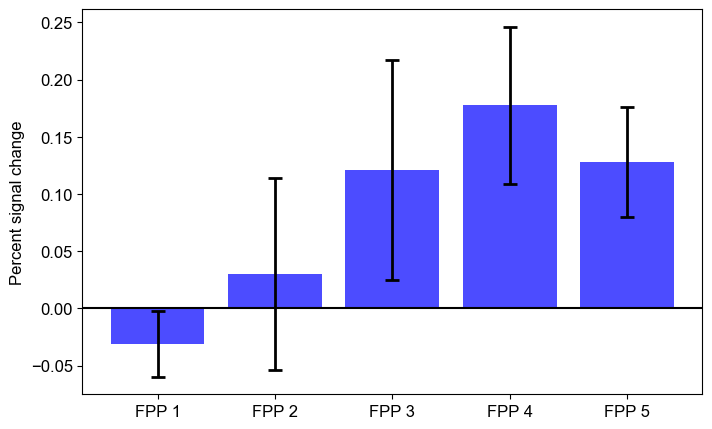

In [48]:
x = np.arange(len(difference_activity_run234_and_run2_int_each_FPP))

plt.figure(figsize=(8, 5))
bars = plt.bar(x, difference_activity_run234_and_run2_int_each_FPP, yerr=SEM_difference_activity_run234_and_run2_int_each_FPP, capsize=5, color='blue', alpha=0.7, ecolor='black', error_kw={'elinewidth':2, 'capsize':5, 'capthick':2})

plt.ylabel('Percent signal change')
plt.xticks(x, [f'FPP {i+1}' for i in x])

plt.axhline(0, color='black', linestyle='-') 

plt.show()

In [39]:
np.concatenate((right_movie_data[right_FPPs_indices[1]][:,ShiftedPreferedSeconds[0]], left_movie_data[left_FPPs_indices[1]][:,ShiftedPreferedSeconds[0]])).shape

(91, 29)

In [43]:
difference_run2_and_run1_in_each_second.shape

(29,)

In [35]:
ShiftedPreferedSeconds.shape

(4, 29)

In [31]:
SEM_difference_activity_run1_and_run2_int_each_FPP_across_frames

array([0.02017807, 0.04083655, 0.04323635, 0.04103933, 0.03671375])

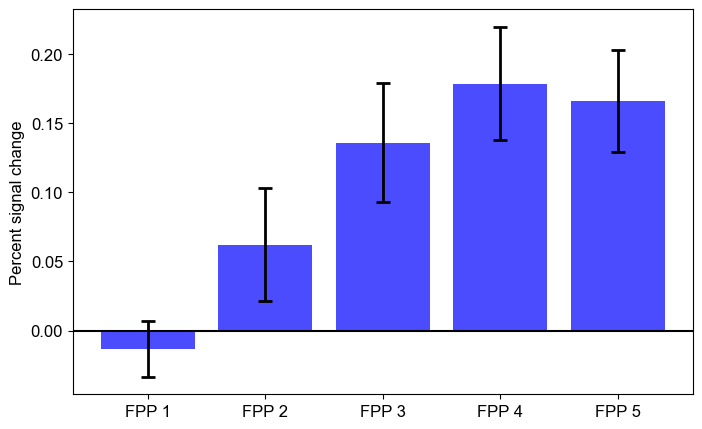

In [33]:
x = np.arange(len(difference_activity_run1_and_run2_int_each_FPP))

plt.figure(figsize=(8, 5))
bars = plt.bar(x, difference_activity_run1_and_run2_int_each_FPP, yerr=SEM_difference_activity_run1_and_run2_int_each_FPP_across_frames, capsize=5, color='blue', alpha=0.7, ecolor='black', error_kw={'elinewidth':2, 'capsize':5, 'capthick':2})

plt.ylabel('Percent signal change')
plt.xticks(x, [f'FPP {i+1}' for i in x])

plt.axhline(0, color='black', linestyle='-') 

plt.show()

In [32]:
Seconds = np.array([np.array(RunSeconds[i]) for i in range(4)])

In [33]:
delay = 5
ShifteddSeconds = (Seconds + delay)%3655

In [34]:
Mean_activity_each_FPP_in_each_run_with_animate = np.zeros((5,4))
SEM_each_FPP_in_each_run_with_animate = np.zeros((5,4))

for FPP in range(5):
    for run in range(4):
        Activity_each_vertices_in_each_run = np.concatenate((right_movie_data[right_FPPs_indices[FPP]][:,ShifteddSeconds[run]], left_movie_data[left_FPPs_indices[FPP]][:,ShifteddSeconds[run]]))
        Mean_activity_FPP_in_each_second_of_run = np.mean(Activity_each_vertices_in_each_run, axis=0)
        Mean_activity_FPP_in_each_run = np.mean(Mean_activity_FPP_in_each_second_of_run)
        Mean_activity_each_FPP_in_each_run_with_animate[FPP, run] = Mean_activity_FPP_in_each_run
        SEM_each_FPP_in_each_run_with_animate[FPP,run] = stats.sem(Mean_activity_FPP_in_each_second_of_run)

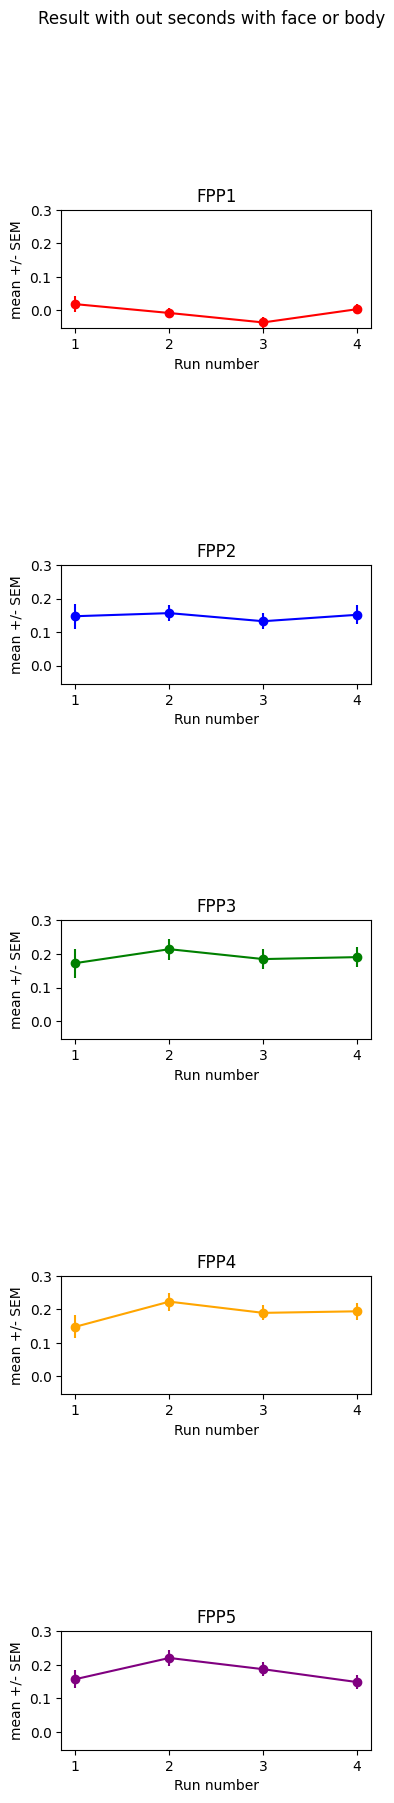

In [39]:
x = [1, 2, 3, 4]

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, axs = plt.subplots(5, 1, figsize=(4, 20))
max_vals = []
min_vals = []
for i in range(5):
    max_vals.append(max(Mean_activity_each_FPP_in_each_run_with_animate[i] + SEM_each_FPP_in_each_run_with_animate[i]))
    min_vals.append(min(Mean_activity_each_FPP_in_each_run_with_animate[i] - SEM_each_FPP_in_each_run_with_animate[i]))

y_min = min(min_vals)
y_max = max(max_vals)
for i in range(5):
    axs[i].set_ylim(y_min, y_max)

# for i in range(5):
#     axs[i].set_yticks(np.arange(y_min, y_max+0.1,0.1))
    
for i in range(5):
    axs[i].errorbar(x, Mean_activity_each_FPP_in_each_run_with_animate[i], yerr=SEM_each_FPP_in_each_run_with_animate[i], fmt='-o', color=colors[i])
    axs[i].set_title(f'FPP{i+1}')
    axs[i].set_xticks(x)
    axs[i].set_xlabel('Run number')
    axs[i].set_ylabel('mean +/- SEM')
    axs[i].set_yticks([0,0.1,0.2,0.3])

plt.subplots_adjust(hspace=2)

plt.suptitle('Result with out seconds with face or body')
plt.show()

In [36]:
Mean_activity_each_FPP_in_each_run_with_animate

array([[ 0.01846555, -0.0078721 , -0.03609696,  0.00349927],
       [ 0.14760337,  0.15683597,  0.13269835,  0.15184522],
       [ 0.17291102,  0.21445087,  0.18495545,  0.19078062],
       [ 0.14821336,  0.2231757 ,  0.18971236,  0.19437835],
       [ 0.15711273,  0.2204033 ,  0.18686112,  0.14842224]])

In [37]:
Mean_activity_each_FPP_in_each_run

array([[0.07094901, 0.05769595, 0.01379826, 0.04897331],
       [0.11729408, 0.17945793, 0.1207279 , 0.14185349],
       [0.12782053, 0.26376539, 0.22148383, 0.26162185],
       [0.10896838, 0.28761538, 0.25811603, 0.31373005],
       [0.1549583 , 0.32099557, 0.25859801, 0.27023594]])